In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X, y_réel = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)#générer un jeu de données bidimensionnel contenant 4 groupes distincts / 300 pt cluster=> grp, cluster_std=> ecart_type, random_state=> generation de nb aléatoire pour la création de jeu de données
df=pd.concat([pd.DataFrame(X), pd.DataFrame(y_réel)], axis=1)#stockage des données dans un DataFrame lui meme obtenue en faisant la concaténation d'un DF conteant X ainsi que y_réel selon l'axe 17
df.head()

,0,1,0
0,1.039925,1.929910,1
1,-1.386091,7.480596,3
2,1.125389,4.966980,0
3,-1.056890,7.818339,3
4,1.402004,1.726729,1


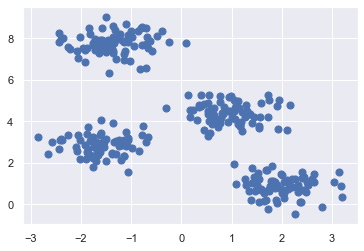

In [5]:
plt.scatter(X[: ,0], X[:, 1], s=50);

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4)#indique le nb de grp
kmeans.fit(X)#deploiement
y_préd = kmeans.predict(X)#donnée en entrée = X et on stocke le résultat dans y_pred

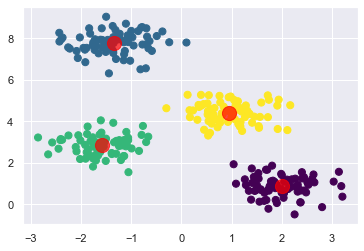

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_préd, s=50, cmap='viridis')
centres = kmeans.cluster_centers_
plt.scatter(centres[:,0], centres[:,1], c='red', s=200, alpha=0.7);#mise en valeur du centre de chaque grp en considérant une variable centre

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_réel, y_préd)

array([[ 0,  0,  0, 75],
       [75,  0,  0,  0],
       [ 0,  0, 75,  0],
       [ 0, 75,  0,  0]], dtype=int64)

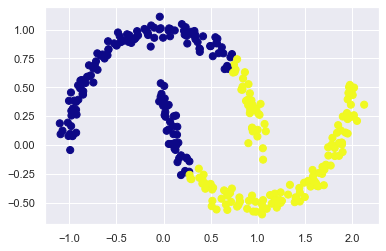

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(300, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='plasma');